In [1]:
#Visualize Samples from the model
import sys,os,glob
from collections import OrderedDict
sys.path.append('../../')
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['lines.linewidth']=5
mpl.rcParams['lines.markersize']=15
mpl.rcParams['text.usetex']=True
mpl.rcParams['text.latex.unicode']=True
mpl.rcParams['font.family'] = 'serif' 
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['text.latex.preamble']= ['\\usepackage{amsfonts}','\\usepackage{amsmath}']
mpl.rcParams['font.size'] = 40
mpl.rcParams['axes.labelsize']=40
mpl.rcParams['legend.fontsize']=40
#http://stackoverflow.com/questions/22408237/named-colors-in-matplotlib
from utils.misc import getConfigFile, readPickle, loadHDF5, getUniqueIDFromParams
from optvaeutils.viz import getName
subdirectories = ['none','finopt']

#DIR = '../../expt/results_dec19/chkpt-rcv2_miao-';MAXEPOCH='200'
DIR = '../../expt/chkpt-wikicorp-';MAXEPOCH='50'

short_names = {}
if os.path.exists('../../optvaeutils/default-hmap.pkl'):
    short_names = readPickle('../../optvaeutils/default-hmap.pkl')[0]
colors = {}
colors[0] = 'r'
colors[1] = 'b'
colors[2] = 'g'
colors[3] = 'k'
colors[4] = 'y'
colors[5] = 'k'
colors[6] = 'm'
colors[7] = 'c'
colors[8] = 'b'

markers = {}
markers[0]= '*'
markers[1]= '<'
markers[2]= '>'
markers[3]= '8'
markers[4]= 'p'
markers[5]= 'v'
markers[6]= '3'
markers[7]= '2'
markers[8]= '4'

#Evalaute POB 
from datasets.load import loadDataset
from optvaedatasets.load import loadDataset as loadDataset_OVAE
dataset        = DIR.split('chkpt-')[1][:-1]
print 'Dataset:', dataset
dset = loadDataset_OVAE(dataset)
NLL_train_prob, NLL_valid_prob = np.nan,np.nan

Loading linear matrices
Loading linear matrices
Dataset: wikicorp
Read  3  objects


In [2]:
#Visualize Training Curves (train/valid/test) across different 
datalist, l_params, namelist = [],[],[]
ctr = 0

results = {}
for sdir in subdirectories:
    for f in glob.glob(DIR+sdir+'/*EP'+MAXEPOCH+'*.h5'):
        print f,
        if 'normalize' in f:
            continue
        params = readPickle(getConfigFile(f))[0]
        params['replicate_K'] = None
        name   = getName(params)
        data   = loadHDF5(f)
        if params['p_layers']<1:
            continue
        l_params.append(params)
        datalist.append(data)
        namelist.append(name)
        if 'valid_bound_0' in data:
            min_0 = np.min(data['valid_bound_0'][:,1])
            min_f = np.min(data['valid_bound_f'][:,1])
            amin  = np.argmin(data['valid_bound_f'][:,1])
            epmin = data['valid_bound_f'][amin,0]
        elif 'valid_perp_0' in data:
            min_0 = np.min(data['valid_perp_0'][:,1])
            min_f = np.min(data['valid_perp_f'][:,1])
            amin  = np.argmin(data['valid_perp_f'][:,1])
            epmin = data['valid_perp_f'][amin,0]
        else:
            print data.keys()
            min_0 = np.min(data['valid_perp_bound_0'][:,1])
            min_f = np.min(data['valid_perp_bound_f'][:,1])
            amin  = np.argmin(data['valid_perp_bound_f'][:,1])
            epmin = data['valid_perp_bound_f'][amin,0]
        print ctr,name,min_0,min_f
        ctr+=1
p_names = getUniqueIDFromParams(l_params, short_names = short_names)
names   = []
for a,b in zip(namelist,p_names):
    names.append(a+b)
idxlist = []
print '\n'
#Restriction
for idx,name in enumerate(names):
    print idx,name
    idxlist.append(idx)
datalist = [datalist[k] for k in idxlist]
def update_name(name):
    ar   = str(name.split('anneal_rate-')[1])
    pl   = str(3)#str(int(name.split('p_layers-')[1].split('-anneal')[0])+1)
    if 'baseline' in name:
        return pl+'-M1'+'-'+str(int(float(ar)/1000))+'k'
    else:
        return pl+'-M'+name.split('fin')[1].split('-')[0]+'-'+ar+'k'

names = [update_name(names[k]) for k in idxlist]

for idx,name in enumerate(names):
    results[name] = datalist[idx]

print '\n Restricted Plots to: ',names

../../expt/chkpt-wikicorp-none/VAE_lr-8_0e-04-ph-400-qh-400-ds-100-pl-2-ql-2-nl-relu-bs-500-ep-52-plr-1_0e-02-ar-1_0e+04-otype-none-ns-100-etype-mlp-ll-mult-itype-tfidfl20_01_-uid-EP50-stats.h5 Read  1  objects
0 baseline_annealKL 1332.40797052 1219.1007156
../../expt/chkpt-wikicorp-none/VAE_lr-8_0e-04-ph-400-qh-400-ds-100-pl-2-ql-2-nl-relu-bs-500-ep-52-plr-1_0e-02-ar-0-otype-none-ns-100-etype-mlp-ll-mult-itype-tfidfl20_01_-uid-EP50-stats.h5 Read  1  objects
1 baseline 1477.2710467 1339.22622251
../../expt/chkpt-wikicorp-none/VAE_lr-8_0e-04-ph-400-qh-400-ds-100-pl-2-ql-2-nl-relu-bs-500-ep-52-plr-1_0e-02-ar-5_0e+04-otype-none-ns-100-etype-mlp-ll-mult-itype-tfidfl20_01_-uid-EP50-stats.h5 Read  1  objects
2 baseline_annealKL 1300.50155841 1185.75775764
../../expt/chkpt-wikicorp-none/VAE_lr-8_0e-04-ph-400-qh-400-ds-100-pl-0-ql-2-nl-relu-bs-500-ep-52-plr-1_0e-02-ar-0-otype-none-ns-100-etype-mlp-ll-mult-itype-tfidfl20_01_-uid-EP50-stats.h5 Read  1  objects
../../expt/chkpt-wikicorp-none/VAE_

[u'valid_perp_0', u'train_bound_0', u'batch_time', u'train_perp_0', u'svals', u'valid_perp_f', u'train_bound_f', u'glcov', u'train_perp_f', u'gmu', u'diff_elbo']
3-M100-0k 1175.70214735 11
[u'valid_perp_0', u'train_bound_0', u'batch_time', u'train_perp_0', u'svals', u'valid_perp_f', u'train_bound_f', u'glcov', u'train_perp_f', u'gmu', u'diff_elbo']
3-M1-10k 1219.1007156 11
[u'valid_perp_0', u'train_bound_0', u'batch_time', u'train_perp_0', u'svals', u'valid_perp_f', u'train_bound_f', u'glcov', u'train_perp_f', u'gmu', u'diff_elbo']
3-M1-50k 1185.75775764 11
[u'valid_perp_0', u'train_bound_0', u'batch_time', u'train_perp_0', u'svals', u'valid_perp_f', u'train_bound_f', u'glcov', u'train_perp_f', u'gmu', u'diff_elbo']
3-M1-100k 1187.53182314 11
valid-wikicorp-anneal.pdf saved


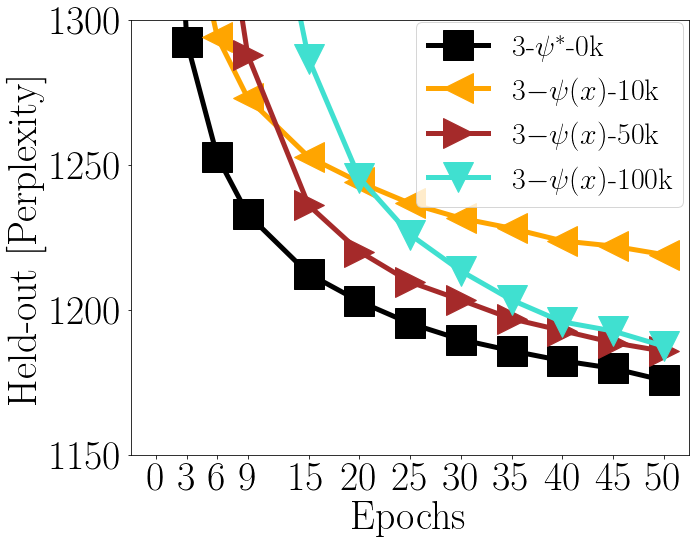

In [9]:
#Visualize Training Curves (train/valid/test)
NS = 'M100'
if 'wikicorp' in dataset:
    NS = 'M100'

colorFinal = OrderedDict()
#colorFinal['1-M1-anneal-0']    =  'r'
colorFinal['1-'+NS+'-0k']= 'red'
colorFinal['3-M1-0k']  =  'green'
colorFinal['3-'+NS+'-0k']=  'black'

colorFinal['3-M1-10k'] =  'orange'
colorFinal['3-M1-50k'] =  'brown'
colorFinal['3-M1-100k']=  'turquoise'
markerFinal = OrderedDict()
markerFinal['1-'+NS+'-0k']  =  '*'
markerFinal['3-M1-0k']    =  'o'
markerFinal['3-M1-10k']   =  '<'
markerFinal['3-M1-50k']   =  '>'
markerFinal['3-M1-100k']  =  'v'
markerFinal['3-'+NS+'-0k']  =  's'

namemap = OrderedDict()
namemap['1-'+NS+'-0k']  =  '$1$-$\\psi^*$-$0$k'
namemap['3-M1-0k']    =  '$3$-$\\psi(x)$-$0$k'
namemap['3-M1-10k']   =  '$3-$\\psi(x)$-$10$k'
namemap['3-M1-50k']   =  '$3-$\\psi(x)$-$50$k'
namemap['3-M1-100k']  =  '$3-$\\psi(x)$-$100$k'
namemap['3-'+NS+'-0k']  =  '$3$-$\\psi^*$-$0$k'

fig,axlist     = plt.subplots(1,1,figsize=(10,8))  
ax = axlist
for name in colorFinal:#['1-M1','1-'+NS,'3-M1','3-'+NS]:
    if name not in results or name=='3-M1-0k':
        continue
    data = results[name]
    print data.keys()
    if 'valid_perp_bound_0' in data:
        valid_bound_0 = data['valid_perp_bound_0']
        valid_bound_f = data['valid_perp_bound_f']
    elif 'valid_perp_0' in data:
        valid_bound_0 = data['valid_perp_0']
        valid_bound_f = data['valid_perp_f']
    else:
        valid_bound_0 = data['valid_bound_0']
        valid_bound_f = data['valid_bound_f']
    print name,np.min(valid_bound_f[:,1]),np.argmin(valid_bound_f[:,1])
    MARKER = markerFinal[name]
    COLOR  = colorFinal[name]
    X = valid_bound_f[:,0]
    #ax.plot(valid_bound_0[:,0],valid_bound_0[:,1],'--',color=COLOR,marker = MARKER)
    ax.plot(X,valid_bound_f[:,1],ms=30,marker = MARKER,color=COLOR,label=namemap[name])

ax.set_ylabel('Held-out [Perplexity]')
ax.set_xlabel('Epochs')
ax.hlines(NLL_valid_prob, 0, ax.get_xlim()[1], linestyles='dashdot',colors='k')
if 'wikicorp' in dataset:
    ax.set_ylim([1150,1300])
    ax.legend(loc='upper center', bbox_to_anchor=(.75, 1.03),ncol=1,columnspacing=0.1,fontsize=30)
    ax.set_xticks(X)
    
fname = 'valid-'+dataset+'-anneal.pdf'
print fname,'saved'
plt.savefig(fname,bbox_inches='tight')

not found: 1-M100-0k
not found: 3-M1-0k
3-M100-0k
3-M1-10k
3-M1-50k
3-M1-100k
train-wikicorp-anneal.pdf saved


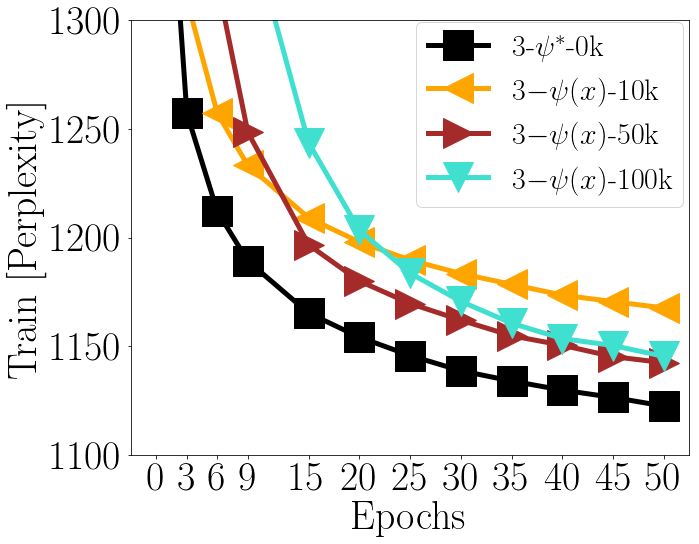

In [7]:
#Visualize Training Curves (train/valid/test)
fig,axlist     = plt.subplots(1,1,figsize=(10,8))  
ax = axlist
for name in colorFinal:
    if name not in results or name=='3-M1-0k':
        print 'not found:',name
        continue
    data = results[name]
    train_bound_0 = data['train_perp_0']
    train_bound_f = data['train_perp_f']
    print name
    MARKER = markerFinal[name]
    COLOR  = colorFinal[name]
    validXY=data['valid_perp_f']
    if 'rcv2' in dataset:
        X  = train_bound_0[:,0][::20]
        Y  = train_bound_0[:,1][::20]
    else:
        X  = train_bound_0[:,0][::5]
        Y  = train_bound_0[:,1][::5]
    #ax.plot(X,Y,'--',color=COLOR,marker = MARKER)
    if 'rcv2' in dataset:
        X  = train_bound_f[:,0][::20]
        Y  = train_bound_f[:,1][::20]
    else:
        X  = train_bound_f[:,0]#[::5]
        Y  = train_bound_f[:,1]#[::5]
    #if 'wikicorp' not in dataset:
    idx = np.where(np.invert(np.isnan(Y)))[0]
    X = X[idx]
    Y = Y[idx]
    #if len(idx)>10:
    #    X = X[::3]
    #    Y = Y[::3]
    ax.plot(X,Y,marker = MARKER,ms=30,color=COLOR,label=namemap[name])

ax.set_ylabel('Train [Perplexity]')
ax.set_xlabel('Epochs')
ax.hlines(NLL_valid_prob, 0, ax.get_xlim()[1], linestyles='dashdot',colors='k')
if 'rcv2_miao' in dataset:
    pass
    #ax.set_xlim([0,200])
    #ax.set_ylim([300,600])
if 'wikicorp' in dataset:
    ax.legend(loc='upper center', bbox_to_anchor=(.75, 1.03),ncol=1,columnspacing=0.1,fontsize=30)
    ax.set_ylim([1100,1300])
    ax.set_xticks(X)
    #ax.set_xticks([0,10,20,30,40,50])
    
fname = 'train-'+dataset+'-anneal.pdf'
print fname,'saved'
plt.savefig(fname,bbox_inches='tight')

not found 1-M100-0k
not found 3-M1-0k
logsingular-wikicorp-anneal.pdf saved


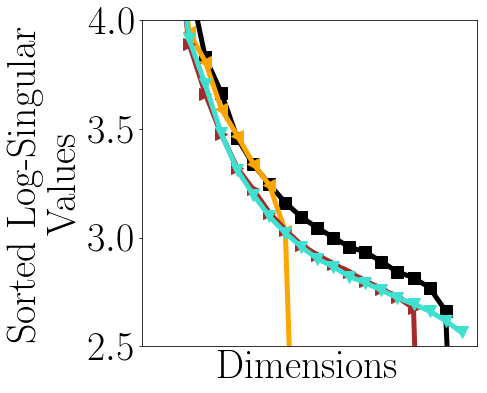

In [11]:
plt.figure(figsize=(6,6))
for name in colorFinal:
    if name not in results or name=='3-M1-0k':
        print 'not found',name
        continue
    sval_last =  results[name]['svals'][-1][1:]
    svals  = np.sort(sval_last)
    if 'res' in name:
        continue
    MARKER = markerFinal[name]
    COLOR  = colorFinal[name]
    plt.plot(np.arange(len(svals))[::5],np.log(svals[::-1])[::5],color=COLOR,marker=MARKER,ms=12,lw=5,label = namemap[name])
    
#plt.legend(loc='upper center', bbox_to_anchor=(.35, 1.4),ncol=3,columnspacing=0.1,fontsize=20)
plt.ylabel('Sorted Log-Singular\nValues')
plt.xlabel('Dimensions')
plt.xticks([])#np.arange(0,101,20))
plt.ylim(2.5,4)

fname = 'logsingular-'+dataset+'-anneal.pdf'
print fname,'saved'
plt.savefig(fname,bbox_inches='tight')